In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import linprog
from joblib import Parallel, delayed
import os
import tempfile
from RiskMeasureEst import *
import random
from Env import Env
from Agent import *
from tqdm import tqdm
from Evaluate import *

In [2]:
gamma = 0.9
aph = 0.50
B = 6
p1 = 0.25
O = 1

In [3]:
p = np.zeros((B,3,B))

from scipy.stats import binom
import numpy as np

def binomial_pmf_all(n, p):
    k_values = np.arange(n + 1)
    return binom.pmf(k_values, n, p)

for sidx in range(B):
    for aidx in range(3):
            p[sidx,aidx] = binomial_pmf_all(B-1,p1)

In [4]:
r = np.zeros((B,3,B))

for sidx in range(B):
    for aidx in range(3):
        for s1idx in range(B):
            if sidx < s1idx:
                r[sidx,aidx,s1idx] = aidx-1
            elif s1idx < sidx:
                r[sidx,aidx,s1idx] = -(aidx-1)
            else:
                r[sidx,aidx,s1idx] = -abs(aidx-1)

In [5]:
adict = evaluate(p,r,B,'CVaR',nameslist = [['CVaR','Mean','1'],\
                         ['CVaR','Mean','2'],\
                         ['CVaR','CVaR','2']],task='CT'
            )

Calculating Ground Truth


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:13<00:00,  2.35it/s]


In [6]:
adict.keys()

dict_keys(['rho_CVaR_beta_Mean_Prior_1', 'rho_CVaR_beta_Mean_Prior_2', 'rho_CVaR_beta_CVaR_Prior_2'])

<AxesSubplot: >

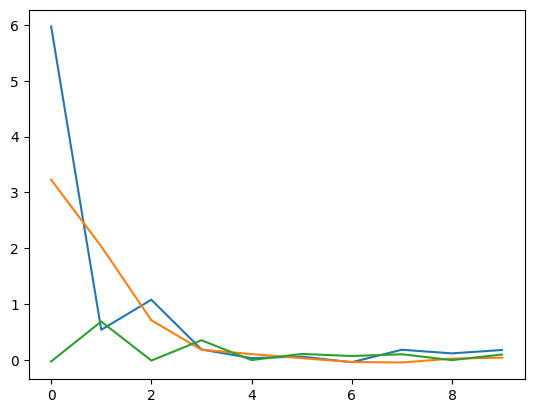

In [7]:
adict['rho_CVaR_beta_Mean_Prior_1'].mean(axis=1).plot()
adict['rho_CVaR_beta_Mean_Prior_2'].mean(axis=1).plot()
adict['rho_CVaR_beta_CVaR_Prior_2'].mean(axis=1).plot()

In [8]:
adict = evaluate_robust_expectation(p,r,[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.60,\
               0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00],\
                            gamma,B,nameslist = [['Mean','Mean','2'],\
                         ['Mean','CVaR','2']],read_file=True,task='CT'
            )

In [9]:
adict.keys()

dict_keys(['rho_Mean_beta_Mean_Prior_2', 'rho_Mean_beta_CVaR_Prior_2'])

<AxesSubplot: >

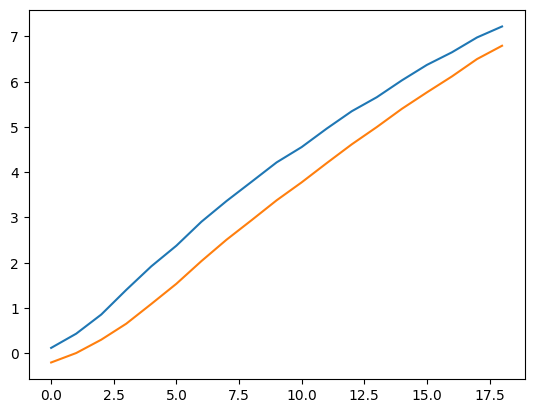

In [10]:
pd.Series(adict['rho_Mean_beta_Mean_Prior_2']).plot()
pd.Series(adict['rho_Mean_beta_CVaR_Prior_2']).plot()

In [11]:
adict = evaluate_robust_CVaR(p,r,[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10],\
                            gamma,B,nameslist = [['CVaR','Mean','2'],\
                         ['CVaR','CVaR','2']],read_file=True,task='CT'
            )

In [12]:
adict.keys()

dict_keys(['rho_CVaR_beta_Mean_Prior_2', 'rho_CVaR_beta_CVaR_Prior_2'])

<AxesSubplot: >

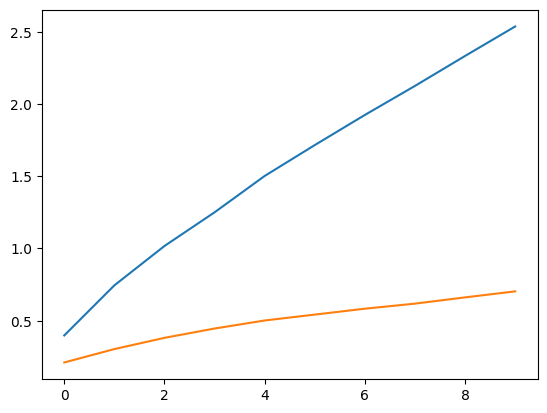

In [13]:
pd.Series(adict['rho_CVaR_beta_Mean_Prior_2']).plot()
pd.Series(adict['rho_CVaR_beta_CVaR_Prior_2']).plot()